In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime
from datetime import timedelta
from dateutil.parser import parse

calendar = pd.read_csv('calendar.csv')
listings = pd.read_csv('listings.csv')
reviews = pd.read_csv('reviews.csv')

## Visualize Headings of all csv files

In [2]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [3]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [4]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [5]:
#Find out the size of the DataFrames
print(len(listings), len(reviews))

3818 84849


## Exploration of Listings Spreadsheet
This section will explore significant features of the listing spreadsheet that can be related to each other. A thorough exploration of the dataset within Kaggle helped to pick out significant features based on datatypes.

In [6]:
#Explore listings price
listings['price'].value_counts()

$150.00    162
$100.00    159
$75.00     118
$95.00     110
$99.00     110
$90.00     107
$125.00    105
$85.00     104
$65.00     104
$80.00      96
$110.00     86
$70.00      80
$55.00      76
$120.00     74
$200.00     74
$175.00     73
$60.00      72
$50.00      70
$250.00     64
$115.00     64
$69.00      59
$40.00      51
$105.00     50
$79.00      46
$129.00     44
$135.00     40
$89.00      40
$130.00     36
$45.00      35
$59.00      34
          ... 
$237.00      1
$498.00      1
$365.00      1
$311.00      1
$287.00      1
$999.00      1
$415.00      1
$26.00       1
$465.00      1
$20.00       1
$163.00      1
$359.00      1
$269.00      1
$198.00      1
$420.00      1
$775.00      1
$333.00      1
$749.00      1
$203.00      1
$146.00      1
$102.00      1
$499.00      1
$172.00      1
$222.00      1
$217.00      1
$480.00      1
$950.00      1
$575.00      1
$360.00      1
$204.00      1
Name: price, Length: 273, dtype: int64

In [7]:
# Check to see how many missing values if any exist in any rows in the listings Data Frame that are being investigated.00
print(listings['instant_bookable'].isnull().mean())
print(listings['cancellation_policy'].isnull().mean())
print(listings['extra_people'].isnull().mean())
print(listings['price'].isnull().mean())
#calendar_drop = calendar.dropna(subset=['price'], axis=0)

0.0
0.0
0.0
0.0


In [8]:
def clean_price (df, price):
    '''
    INPUT
    df - pandas dataframe 
    price - column name of prices in the dataframe in a string format     
    
    OUTPUT
    df[price] - The cleaned up column in the dataframe converted to 'float64' format
       
    This function cleans a price of its '$' and any commas and converts the string to a float.
    '''   
    for x in range(len(df)):
        df[price][x] = df[price][x].replace('$','')
        df[price][x] = df[price][x].replace(',','')  
        df[price][x] = float(df[price][x])
    return df[price]

In [9]:
#Clean the prices in the 'listings' DataFrame
listings['price_cleansed'] = clean_price(listings, 'price')
listings['price_cleansed']

C:\Users\audha\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\audha\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\audha\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


0        85
1       150
2       975
3       100
4       450
5       120
6        80
7        60
8        90
9       150
10       95
11       99
12      245
13      165
14      461
15      109
16       66
17       99
18      200
19      700
20      110
21       99
22      450
23       75
24      600
25      450
26      150
27       45
28      300
29       80
       ... 
3788    115
3789     60
3790    175
3791     85
3792    109
3793    109
3794    107
3795    200
3796     85
3797     70
3798     77
3799     65
3800    185
3801    108
3802    200
3803    250
3804    125
3805    100
3806    160
3807    109
3808    175
3809    120
3810    154
3811     65
3812     95
3813    359
3814     79
3815     93
3816     99
3817     87
Name: price_cleansed, Length: 3818, dtype: object

In [10]:
#Exploring different columns of 'listings'
listings['cancellation_policy'].value_counts()

strict      1417
moderate    1251
flexible    1150
Name: cancellation_policy, dtype: int64

In [11]:
# Determine whether a strict cancellation policy is correlated with price
strict = listings[listings.cancellation_policy == 'strict'][['cancellation_policy','price_cleansed']]
strict['price_cleansed'].mean()

154.5970359915314

In [12]:
moderate = listings[listings.cancellation_policy == 'moderate'][['cancellation_policy','price_cleansed']]
moderate['price_cleansed'].mean()

114.77537969624301

In [13]:
flexible = listings[listings.cancellation_policy == 'flexible'][['cancellation_policy','price_cleansed']]
flexible['price_cleansed'].mean()

109.53478260869565

In [14]:
def cancellation_instant_bookable_relation (df, t_or_f, category):
    '''
    INPUT
    df - pandas dataframe 
    t_or_f - value of 't' if instantly bookable or 'f' if not
    category - for cancellation policy column - strict, moderate, flexible
    
    OUTPUT
    Mean price of all items that mean the conditions of the query
       
    This function determines the mean price of AirBnBs based on the relationship between the AirBnB
    being instantly bookable and its cancellation policy.
    '''   
    relationship = df[(df.instant_bookable == t_or_f) & (df.cancellation_policy == category)][['cancellation_policy','price_cleansed']]
    return relationship['price_cleansed'].mean()


In [15]:
# Use combinations of categories of cancellation policy and instant booking and create lists of bookable and
# not bookable of prices for each cancellation policy 
bookable = [cancellation_instant_bookable_relation(listings,'t','strict'),
            cancellation_instant_bookable_relation(listings,'t','moderate'),
            cancellation_instant_bookable_relation(listings,'t','flexible')]
not_bookable = [cancellation_instant_bookable_relation(listings,'f','strict'),
                cancellation_instant_bookable_relation(listings,'f','moderate'),    
                cancellation_instant_bookable_relation(listings,'f','flexible')]
print(bookable)
print(not_bookable)

[144.32751091703057, 109.58189655172414, 101.6]
[156.57659932659934, 115.95780176643768, 110.54607843137255]


In [16]:
print(listings['price_cleansed'].mean())

127.97616553169199


In [17]:
listings['extra_people'].value_counts()

$0.00      2048
$10.00      355
$25.00      322
$15.00      309
$20.00      308
$50.00      113
$30.00       85
$5.00        58
$40.00       39
$35.00       35
$100.00      16
$75.00       14
$7.00        12
$45.00       10
$29.00        9
$8.00         8
$12.00        8
$60.00        8
$18.00        6
$17.00        6
$19.00        5
$9.00         5
$14.00        4
$6.00         4
$55.00        3
$80.00        3
$28.00        3
$49.00        2
$300.00       2
$200.00       2
$22.00        2
$48.00        1
$85.00        1
$16.00        1
$13.00        1
$71.00        1
$250.00       1
$33.00        1
$44.00        1
$175.00       1
$26.00        1
$27.00        1
$21.00        1
$36.00        1
$68.00        1
Name: extra_people, dtype: int64

In [18]:
# Clean extra_people column prices
listings['extra_people_cleansed'] = clean_price(listings,'extra_people')
print(listings['extra_people_cleansed'])


C:\Users\audha\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\audha\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\audha\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


0        5
1        0
2       25
3        0
4       15
5       30
6       10
7        0
8        0
9        0
10      15
11       0
12       0
13      20
14      50
15       0
16      25
17       0
18       0
19       0
20       0
21      10
22       0
23       0
24       0
25      50
26       0
27       0
28       0
29      50
        ..
3788    12
3789    25
3790    30
3791     0
3792     0
3793    30
3794    30
3795     0
3796     0
3797    20
3798    15
3799     0
3800     0
3801    10
3802     0
3803    25
3804     0
3805    20
3806     0
3807     0
3808    30
3809     0
3810    50
3811     0
3812     8
3813     0
3814    25
3815    20
3816     0
3817     0
Name: extra_people_cleansed, Length: 3818, dtype: object


In [19]:
listings['extra_people_cleansed'].mean()

10.667627029858565

In [20]:
# Create DataFrames with Cancellation policy and extra people prices as columns where all the items have the
# same cancellation policy then find the average price for each cancellation policy and append to a list.
extra_people_price = []

In [21]:
extra_people_strict = listings[listings.cancellation_policy == 'strict'][['cancellation_policy','extra_people_cleansed']]
extra_people_price.append(extra_people_strict['extra_people_cleansed'].mean())

In [22]:
extra_people_moderate = listings[listings.cancellation_policy == 'moderate'][['cancellation_policy','extra_people_cleansed']]
extra_people_price.append(extra_people_moderate['extra_people_cleansed'].mean())

In [23]:
extra_people_flexible = listings[listings.cancellation_policy == 'flexible'][['cancellation_policy','extra_people_cleansed']]
extra_people_price.append(extra_people_flexible['extra_people_cleansed'].mean())

In [24]:
print(len(bookable))

3


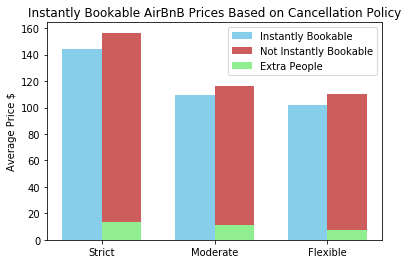

In [25]:
# Graph out the average Instantly Bookable AirBnB Prices based on Cancellation Policy and save graph to file.
ind = np.arange(len(bookable))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, bookable, width, color='SkyBlue', label='Instantly Bookable')
rects2 = ax.bar(ind + width/2, not_bookable, width, color='IndianRed', label='Not Instantly Bookable')
rects3 = ax.bar(ind + width/2, extra_people_price, width, color = 'LightGreen', label = 'Extra People')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Price $')
ax.set_title('Instantly Bookable AirBnB Prices Based on Cancellation Policy')
ax.set_xticks(ind)
ax.set_xticklabels(('Strict', 'Moderate', 'Flexible'))
ax.legend()
plt.savefig('bookable_output.png')

In [26]:
# Explore how categoreis of cancellation policy and number AirBnB accommodates relate to each other.
listings.groupby(['cancellation_policy'])['accommodates'].mean()

cancellation_policy
flexible    2.721739
moderate    3.110312
strict      4.069866
Name: accommodates, dtype: float64

In [27]:
# Explore how categories of instant_bookable and number AirBnB accommodates relate to each other
listings.groupby(['instant_bookable'])['accommodates'].mean()

instant_bookable
f    3.328788
t    3.461929
Name: accommodates, dtype: float64

In [28]:
# Explore general review scores
listings['review_scores_rating'].value_counts()

100.0    781
98.0     292
96.0     278
97.0     266
95.0     260
94.0     198
93.0     184
99.0     146
90.0     138
80.0     111
92.0     105
91.0      97
87.0      55
89.0      53
88.0      47
85.0      24
84.0      23
86.0      17
83.0      13
60.0      12
82.0      10
70.0       8
73.0       7
76.0       5
72.0       4
78.0       4
77.0       4
40.0       4
75.0       3
71.0       3
81.0       3
68.0       2
74.0       2
67.0       2
79.0       2
66.0       2
64.0       1
20.0       1
53.0       1
65.0       1
55.0       1
57.0       1
Name: review_scores_rating, dtype: int64

In [29]:
# See how review scores relate to the number of people an AirBnB accommodates
rating_to_accommodate = listings.groupby(['review_scores_rating'])['accommodates'].mean()
ratings = []
for x in rating_to_accommodate:
    ratings.append(x)
print(rating_to_accommodate.index)
print(ratings)

Float64Index([ 20.0,  40.0,  53.0,  55.0,  57.0,  60.0,  64.0,  65.0,  66.0,
               67.0,  68.0,  70.0,  71.0,  72.0,  73.0,  74.0,  75.0,  76.0,
               77.0,  78.0,  79.0,  80.0,  81.0,  82.0,  83.0,  84.0,  85.0,
               86.0,  87.0,  88.0,  89.0,  90.0,  91.0,  92.0,  93.0,  94.0,
               95.0,  96.0,  97.0,  98.0,  99.0, 100.0],
             dtype='float64', name='review_scores_rating')
[2.0, 2.5, 8.0, 3.0, 2.0, 3.9166666666666665, 4.0, 1.0, 3.5, 3.0, 4.5, 2.5, 5.0, 4.0, 3.5714285714285716, 2.0, 4.333333333333333, 3.8, 4.0, 3.0, 2.0, 3.3963963963963963, 2.3333333333333335, 3.3, 3.4615384615384617, 4.565217391304348, 3.7916666666666665, 2.9411764705882355, 3.4545454545454546, 3.9574468085106385, 3.018867924528302, 3.6449275362318843, 3.268041237113402, 3.361904761904762, 3.5434782608695654, 3.257575757575758, 3.2423076923076923, 3.366906474820144, 3.300751879699248, 3.1746575342465753, 2.910958904109589, 3.541613316261204]


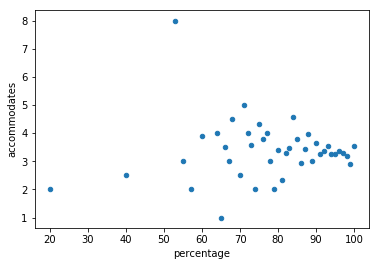

In [30]:
# Create a scatter plot of rating percentage with accommodates
df1 = pd.DataFrame({'accommodates': ratings, 'percentage': rating_to_accommodate.index})
ax2 = df1.plot.scatter(x='percentage', y='accommodates')
plt.savefig('scatter.png')

## Exploring the Calendar dataset
Clean up the calendar of date and prices then determine most expensive time of year to visit Seattle.

In [31]:
# Clean calendar of all missing values since percentage of missing values is very low.
calendar['price'].isnull().mean()
calendar_drop = calendar.dropna(subset=['price'], axis=0)

In [32]:
# Reset index of new DataFrame
calendar_drop = calendar_drop.reset_index(drop=True)

In [33]:
# Verify new index and no missing values
calendar_drop['price'].isnull().mean()
calendar_drop.shape

(934542, 4)

In [34]:
calendar_drop

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-13,t,$85.00
3,241032,2016-01-14,t,$85.00
4,241032,2016-01-18,t,$85.00
5,241032,2016-01-19,t,$85.00
6,241032,2016-01-20,t,$85.00
7,241032,2016-01-24,t,$85.00
8,241032,2016-01-25,t,$85.00
9,241032,2016-01-26,t,$85.00


In [35]:
# Explore 'price' in calendar_drop
calendar_drop['price'].value_counts()

$150.00    36646
$100.00    31755
$75.00     29820
$125.00    27538
$65.00     26415
$90.00     24942
$95.00     24327
$99.00     23629
$85.00     23455
$80.00     19817
$110.00    19454
$120.00    19145
$70.00     18439
$60.00     18004
$175.00    17707
$250.00    16870
$55.00     16864
$200.00    16144
$50.00     15978
$115.00    14775
$40.00     13357
$69.00     12922
$135.00    11455
$105.00    11062
$130.00    11008
$89.00     10355
$79.00     10133
$225.00     8163
$45.00      8134
$129.00     8111
           ...  
$708.00        1
$722.00        1
$570.00        1
$562.00        1
$674.00        1
$406.00        1
$683.00        1
$711.00        1
$643.00        1
$751.00        1
$737.00        1
$567.00        1
$794.00        1
$652.00        1
$624.00        1
$583.00        1
$534.00        1
$494.00        1
$817.00        1
$524.00        1
$12.00         1
$733.00        1
$727.00        1
$654.00        1
$625.00        1
$676.00        1
$745.00        1
$788.00       

In [36]:
calendar.columns

Index(['listing_id', 'date', 'available', 'price'], dtype='object')

In [37]:
# Convert date to date_time
date = list(calendar_drop['date'])
calendar_drop['date_time'] = [parse(x) for x in date]
calendar_drop['date_time']

0        2016-01-04
1        2016-01-05
2        2016-01-13
3        2016-01-14
4        2016-01-18
5        2016-01-19
6        2016-01-20
7        2016-01-24
8        2016-01-25
9        2016-01-26
10       2016-01-27
11       2016-01-28
12       2016-02-01
13       2016-02-02
14       2016-02-03
15       2016-02-04
16       2016-02-05
17       2016-02-06
18       2016-02-07
19       2016-02-08
20       2016-02-09
21       2016-02-10
22       2016-02-14
23       2016-02-15
24       2016-02-16
25       2016-02-17
26       2016-02-18
27       2016-02-19
28       2016-02-20
29       2016-02-21
            ...    
934512   2016-06-08
934513   2016-06-09
934514   2016-06-10
934515   2016-06-11
934516   2016-06-12
934517   2016-06-13
934518   2016-06-14
934519   2016-06-15
934520   2016-06-16
934521   2016-06-17
934522   2016-06-18
934523   2016-06-19
934524   2016-06-20
934525   2016-06-21
934526   2016-06-22
934527   2016-06-23
934528   2016-06-24
934529   2016-06-25
934530   2016-06-26


In [38]:
# Divide calendar into appropriate seasons putting the price column into appropriate lists.
# Winter is from December to February, Spring from March to May,
# Summer from June to September and Fall from October to November.
winter = []
spring = []
summer = []
fall = []
for x in range(len(calendar_drop)):
    if calendar_drop['date_time'][x].month in [1,2,12]:
        winter.append(calendar_drop['price'][x])
    elif calendar_drop['date_time'][x].month in [3,4,5]:
        spring.append(calendar_drop['price'][x])
    elif calendar_drop['date_time'][x].month in [6,7,8,9]:
        summer.append(calendar_drop['price'][x])
    else:
        fall.append(calendar_drop['price'][x])
    

In [41]:
def clean_season_price(season):
    '''
    INPUT
    season - List of prices for a particular season 
    OUTPUT
    Returns the list of prices in 'float64' format
       
    This function cleans a price of its '$' and any commas and converts the string to a float.
    '''   
    for x in range(len(season)):
        season[x] = season[x].replace('$','')
        season[x] = season[x].replace(',','')  
        season[x] = float(season[x])
    return season

In [42]:
# Convert all season lists to Panda Series
winter = pd.DataFrame(clean_season_price(winter), columns = ['winter']) 
spring = pd.DataFrame(clean_season_price(spring), columns = ['spring'])
summer = pd.DataFrame(clean_season_price(summer), columns = ['summer'])
fall = pd.DataFrame(clean_season_price(fall), columns = ['fall'])

In [43]:
# Find the average prices in each season
winter['winter'].mean()

128.9025115502909

In [44]:
spring['spring'].mean()

134.31997199369857

In [45]:
summer['summer'].mean()

148.32630737004973

In [46]:
fall['fall'].mean()

136.3630296313437

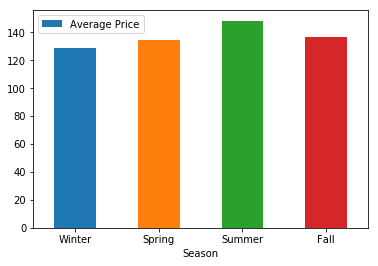

In [63]:
# Graph seasons with mean prices
df = pd.DataFrame({'Season':['Winter', 'Spring', 'Summer', 'Fall'], 'Average Price':[winter['winter'].mean(), spring['spring'].mean(),
                                                                            summer['summer'].mean(), fall['fall'].mean()]})
ax = df.plot.bar(x='Season', y='Average Price', rot=0)
plt.savefig('season.png')

## Exploring the Reviews dataset

Start exploring reviews to create a sentiment value for each review then divide the dataset into seasons to determine which seasons have the most negative reviews.

In [48]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [49]:
reviews['date'].isnull().mean()


0.0

In [50]:
reviews['comments']

0        Cute and cozy place. Perfect location to every...
1        Kelly has a great room in a very central locat...
2        Very spacious apartment, and in a great neighb...
3        Close to Seattle Center and all it has to offe...
4        Kelly was a great host and very accommodating ...
5        Kelly was great, place was great, just what I ...
6        Kelly was great! Very nice and the neighborhoo...
7        hola all bnb erz - Just left Seattle where I h...
8        Kelly's place is conveniently located on a qui...
9        The place was really nice, clean, and the most...
10       The place was really nice, clean and quiet at ...
11       The listing was exactly as described!  Kelly's...
12       Very welcoming and a nicer place to live in th...
13       Great location, great price, great host! Thank...
14       Staying at Kelly's was easy. The location was ...
15       Kelly was an amazing host who made the stay ve...
16       Despite our late booking request, Rachel & Jon.

In [51]:
# Remove missing values from dataset
reviews_drop = reviews.dropna(subset=['comments'], axis=0)

In [52]:
# Reset index of new DataFrame
reviews_drop = reviews_drop.reset_index(drop=True)

In [53]:
# Convert dates to date_time
review_date = list(reviews_drop['date'])
reviews_drop['date_time'] = [parse(x) for x in review_date]
reviews_drop['date_time']


0       2015-07-19
1       2015-07-20
2       2015-07-26
3       2015-08-02
4       2015-08-10
5       2015-08-23
6       2015-09-01
7       2015-09-13
8       2015-09-21
9       2015-09-26
10      2015-10-04
11      2015-10-12
12      2015-11-13
13      2015-11-21
14      2015-11-29
15      2016-01-02
16      2014-10-05
17      2014-10-13
18      2014-11-16
19      2014-11-17
20      2014-11-30
21      2014-12-01
22      2014-12-08
23      2014-12-15
24      2014-12-20
25      2014-12-25
26      2015-01-11
27      2015-02-09
28      2015-02-25
29      2015-02-27
           ...    
84801   2015-08-26
84802   2015-09-11
84803   2015-09-21
84804   2015-09-27
84805   2015-09-30
84806   2015-11-02
84807   2015-11-16
84808   2015-11-23
84809   2015-11-27
84810   2015-11-20
84811   2015-12-01
84812   2014-09-22
84813   2014-11-21
84814   2015-03-03
84815   2015-03-30
84816   2015-04-13
84817   2015-05-10
84818   2015-05-18
84819   2015-05-24
84820   2015-06-17
84821   2015-07-01
84822   2015

In [54]:
reviews_drop['comments']

0        Cute and cozy place. Perfect location to every...
1        Kelly has a great room in a very central locat...
2        Very spacious apartment, and in a great neighb...
3        Close to Seattle Center and all it has to offe...
4        Kelly was a great host and very accommodating ...
5        Kelly was great, place was great, just what I ...
6        Kelly was great! Very nice and the neighborhoo...
7        hola all bnb erz - Just left Seattle where I h...
8        Kelly's place is conveniently located on a qui...
9        The place was really nice, clean, and the most...
10       The place was really nice, clean and quiet at ...
11       The listing was exactly as described!  Kelly's...
12       Very welcoming and a nicer place to live in th...
13       Great location, great price, great host! Thank...
14       Staying at Kelly's was easy. The location was ...
15       Kelly was an amazing host who made the stay ve...
16       Despite our late booking request, Rachel & Jon.

In [55]:
from textblob import TextBlob
import re
sentiment = []
def clean_review(review):
    '''
    Utility function to clean the text in a review by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", review).split())

def textblob_analyze_sentiment(review):
    '''
    Utility function to classify the polarity of a review
    using textblob.
    '''
    analysis = TextBlob(clean_review(review))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1
for count in range(len(reviews_drop)):
    sentiment.append(textblob_analyze_sentiment(reviews_drop['comments'][count]))

In [56]:
# Add sentiment values to the reviews_drop DataFrame
reviews_drop['sentiment'] = pd.DataFrame(sentiment)

In [57]:
reviews_drop.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,date_time,sentiment
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...,2015-07-19,1
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...,2015-07-20,1
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb...",2015-07-26,1
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...,2015-08-02,1
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...,2015-08-10,1


In [58]:
# Divide calendar into appropriate seasons putting the sentiment column into appropriate lists.
# Winter is from December to February, Spring from March to May,
# Summer from June to September and Fall from October to November.
winter1 = []
spring1 = []
summer1 = []
fall1 = []
for x in range(len(reviews_drop)):
    if reviews_drop['date_time'][x].month in [1,2,12]:
        winter1.append(reviews_drop['sentiment'][x])
    elif reviews_drop['date_time'][x].month in [3,4,5]:
        spring1.append(reviews_drop['sentiment'][x])
    elif reviews_drop['date_time'][x].month in [6,7,8,9]:
        summer1.append(reviews_drop['sentiment'][x])
    else:
        fall1.append(reviews_drop['sentiment'][x])
        
# Create Panda Series out of each of the lists
wint1 = pd.DataFrame(winter1, columns = ['sentiment'])
spr1 = pd.DataFrame(spring1, columns = ['sentiment'])
sum1 = pd.DataFrame(summer1, columns = ['sentiment'])
fal1 = pd.DataFrame(fall1, columns = ['sentiment'])
 

In [59]:
# Explore the sentiment for each season

print(wint1['sentiment'].value_counts())
print(spr1['sentiment'].value_counts())
print(sum1['sentiment'].value_counts())
print(fal1['sentiment'].value_counts())

 1    10972
 0      214
-1       50
Name: sentiment, dtype: int64
 1    13894
 0      284
-1       63
Name: sentiment, dtype: int64
 1    42713
 0      808
-1      214
Name: sentiment, dtype: int64
 1    15215
 0      321
-1       83
Name: sentiment, dtype: int64


In [60]:
# Find the percentage of reviews that are negative for each season

count1 = wint1[wint1.sentiment==-1].count()/len(wint1)*100
print(count1[0])
count2 = spr1[spr1.sentiment==-1].count()/len(spr1)*100
print(count2[0])
count3 = sum1[sum1.sentiment==-1].count()/len(sum1)*100
print(count3[0])
count4 = fal1[fal1.sentiment==-1].count()/len(fal1)*100
print(count4[0])

0.44499822000711997
0.4423846639983148
0.4893106207842689
0.531404059158717


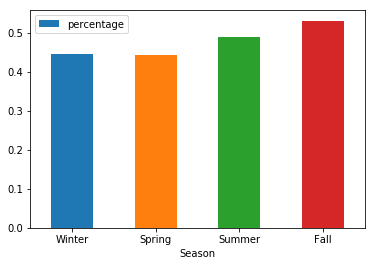

In [61]:
# Graph the Seasons vs Percentage

df2 = pd.DataFrame({'Season':['Winter', 'Spring', 'Summer', 'Fall'], 'percentage':[count1[0], count2[0], count3[0], count4[0]]})
ax = df2.plot.bar(x='Season', y='percentage', rot=0)
plt.savefig('season_reviews.png')